# DataSet Titanic

## Importation des librairies

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## Chargement des données

In [252]:
# on charge les données xls
df = pd.read_excel('titanic3.xls')
# afficher les 5 premières lignes
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [253]:
# on affiche les 5 dernières lignes
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [254]:
# on renomme les champs pour plus de clarté
df.rename(columns={'pclass':'Classe','sibsp':'NbFrereSoeur','parch':'NbParentEnfant','embarked':'Embarquement', 'cabin':'Cabine', 'ticket':'Billet', 'fare': 'Tarif', 'survived': 'Survivant', 'name' : 'Nom', 'sex' : 'Sexe', 'age' : 'Age', 'passengerId' : 'IdPassager'}, inplace=True)
df.head()

,Classe,Survivant,Nom,Sexe,Age,NbFrereSoeur,NbParentEnfant,Billet,Tarif,Cabine,Embarquement,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [255]:
# retire les colonnes inutiles
df.drop(['Nom', 'Billet', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
df.head()

,Classe,Survivant,Sexe,Age,NbFrereSoeur,NbParentEnfant,Tarif,Cabine,Embarquement
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22 C26,S
2,1,0,female,2.0000,1,2,151.5500,C22 C26,S
3,1,0,male,30.0000,1,2,151.5500,C22 C26,S
4,1,0,female,25.0000,1,2,151.5500,C22 C26,S


## Description des données

In [256]:
# on affiche les types de données
df.dtypes

Classe              int64
Survivant           int64
Sexe               object
Age               float64
NbFrereSoeur        int64
NbParentEnfant      int64
Tarif             float64
Cabine             object
Embarquement       object
dtype: object

In [257]:
df['Embarquement'].value_counts()

S    914
C    270
Q    123
Name: Embarquement, dtype: int64

In [258]:
df.drop(['Embarquement'], axis=1, inplace=True)
df.head()

,Classe,Survivant,Sexe,Age,NbFrereSoeur,NbParentEnfant,Tarif,Cabine
0,1,1,female,29.0000,0,0,211.3375,B5
1,1,1,male,0.9167,1,2,151.5500,C22 C26
2,1,0,female,2.0000,1,2,151.5500,C22 C26
3,1,0,male,30.0000,1,2,151.5500,C22 C26
4,1,0,female,25.0000,1,2,151.5500,C22 C26


In [259]:
for i in df.columns:
    print(df[i].value_counts())
    print('---------------------')

3    709
1    323
2    277
Name: Classe, dtype: int64
---------------------
0    809
1    500
Name: Survivant, dtype: int64
---------------------
male      843
female    466
Name: Sexe, dtype: int64
---------------------
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: Age, Length: 98, dtype: int64
---------------------
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: NbFrereSoeur, dtype: int64
---------------------
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: NbParentEnfant, dtype: int64
---------------------
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: Tarif, Length: 281, dtype: int64
---------------------
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33          

## Valeurs manquantes

<AxesSubplot:>

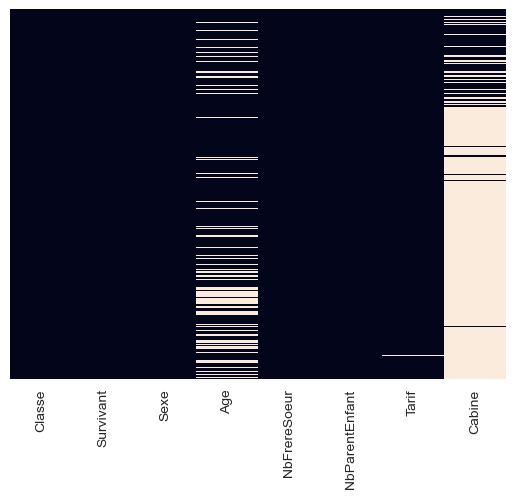

In [260]:
# Analyse des données manquantes
# on affiche sous forme d'une barre les données manquantes
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Classe', ylabel='Cabine'>

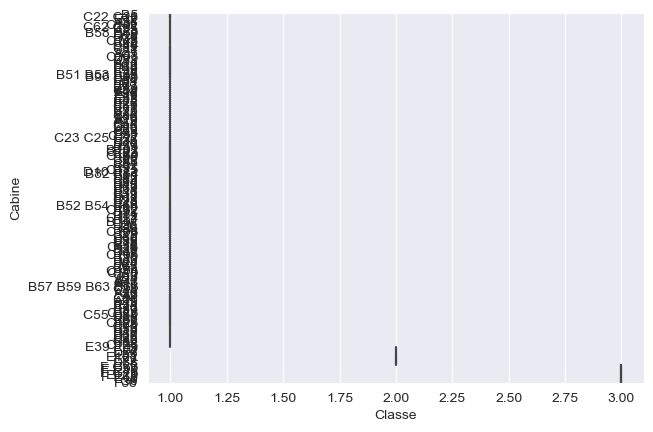

In [261]:
# on affiche la correspondance entre les cabines et les classes
sns.boxplot(x='Classe', y='Cabine', data=df)

<AxesSubplot:>

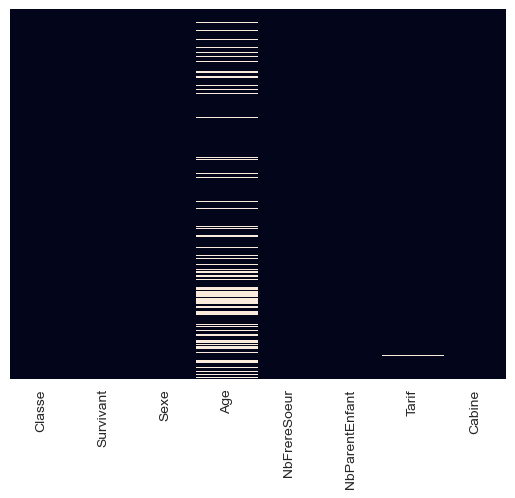

In [262]:
# on remplace les valeurs manquantes par 0 et les autres par 1
df['Cabine'] = df['Cabine'].apply(lambda x: 0 if pd.isna(x) else 1)
# on remplace aussi les sex par des valeurs numériques (0 pour homme et 1 pour femme)
df['Sexe'] = df['Sexe'].apply(lambda x: 0 if x == 'male' else 1)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [263]:
# on supprime la valeur manquante du tarif
df = df.dropna(subset=['Tarif'])

In [264]:
# on récupère l'index des valeurs manquantes de l'age
index = df[df['Age'].isnull()].index
# on remplace les valeurs manquantes de l'age par un tirage aléatoire suivant la distribution de l'age en fonction de la classe
# on affiche les valeurs manquantes de l'age en fonction de la classe
for i in df['Classe'].unique():
    print('Classe : ', i)
    count = df[df['Classe'] == i]['Age'].isnull().value_counts()
    print(count[True] / (count[True] + count[False]) * 100, '%')
    print('---------------------')
# affiche le nombre total de valeurs manquantes
print('Total : ', df['Age'].isnull().value_counts()[True])

Classe :  1
12.074303405572756 %
---------------------
Classe :  2
5.776173285198556 %
---------------------
Classe :  3
29.37853107344633 %
---------------------
Total :  263


## Analyse univariée

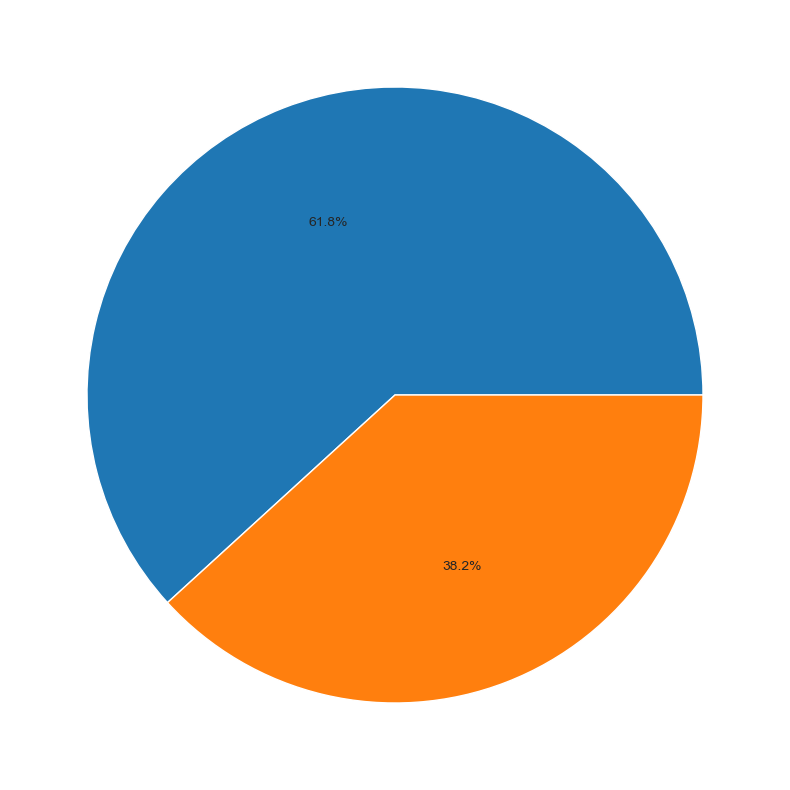

In [265]:
# Analyse univariée de la variable Survivant
# on affiche les données des survivants dans un camembert
plt.figure(figsize=(18, 10))
plt.pie(df["Survivant"].value_counts(), autopct='%1.1f%%')
plt.show()

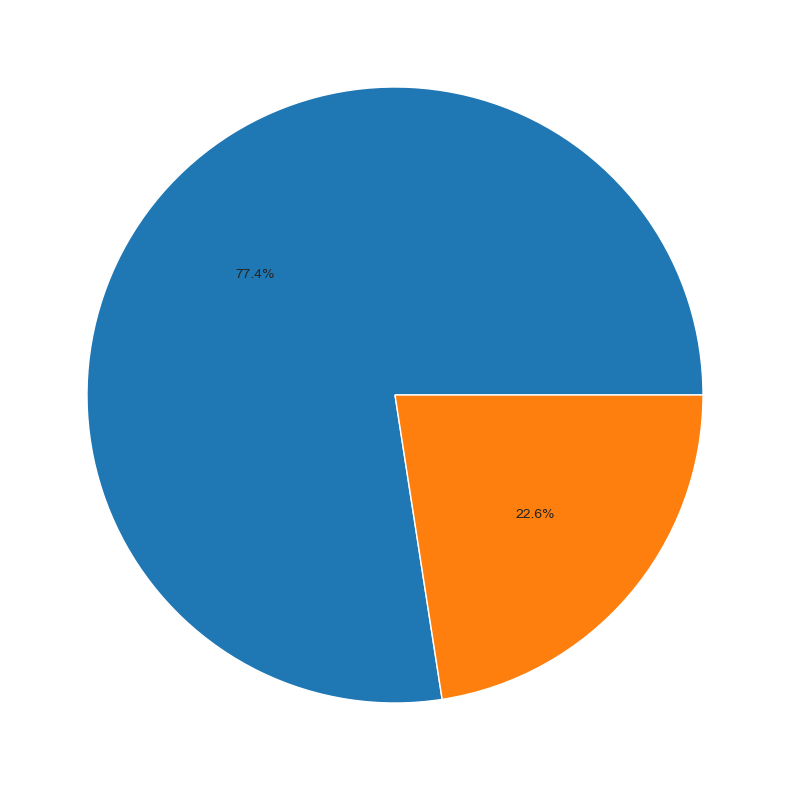

In [266]:
# on affiche les données des cabines dans un camembert
plt.figure(figsize=(18, 10))
plt.pie(df["Cabine"].value_counts(), autopct='%1.1f%%')
plt.show()

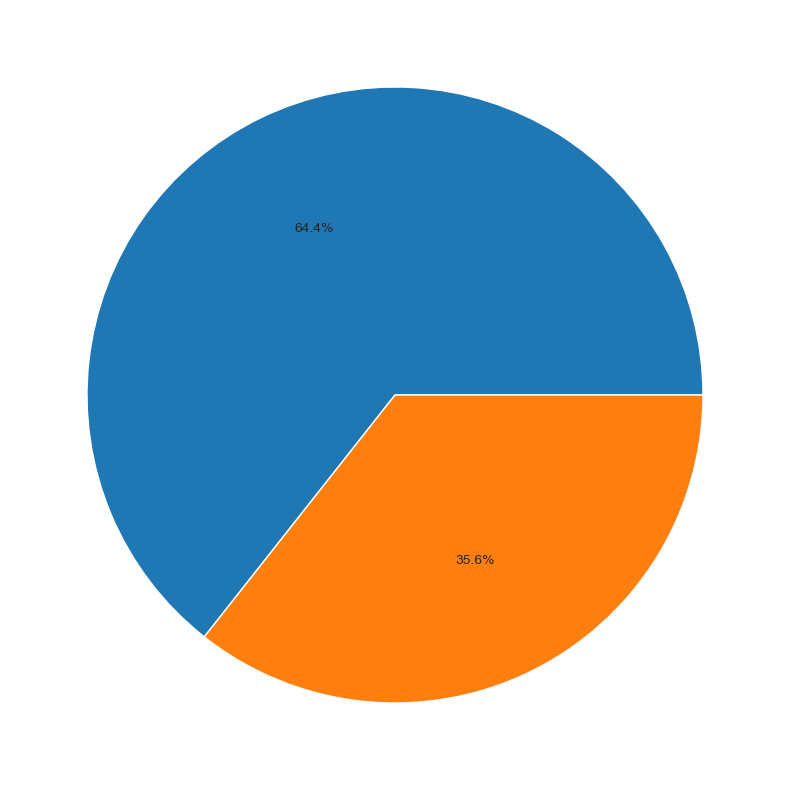

In [267]:
# on affiche les données des sex dans un camembert
plt.figure(figsize=(18, 10))
plt.pie(df["Sexe"].value_counts(), autopct='%1.1f%%')
plt.show()

## Analyse bivariée

<AxesSubplot:xlabel='Classe', ylabel='count'>

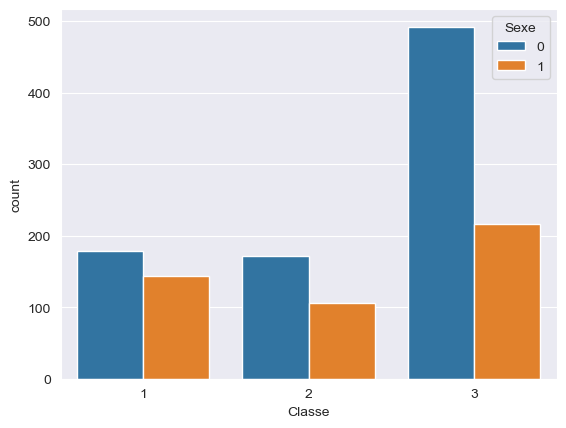

In [268]:
# on affiche le sexe en fonction de la classe
sns.countplot(x='Classe', hue='Sexe', data=df)

<AxesSubplot:xlabel='Classe', ylabel='Age'>

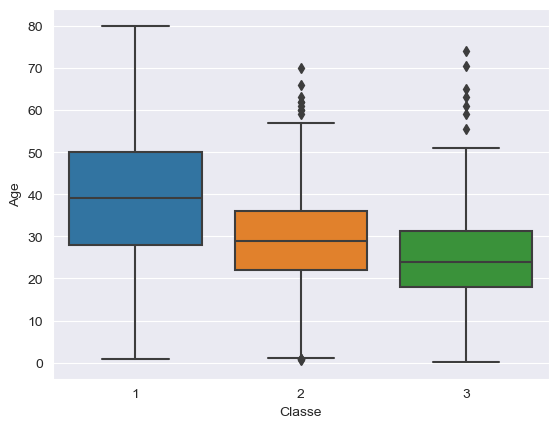

In [269]:
# on affiche l'age en fonction de la classe
sns.boxplot(x='Classe', y='Age', data=df)

<AxesSubplot:xlabel='Tarif', ylabel='Age'>

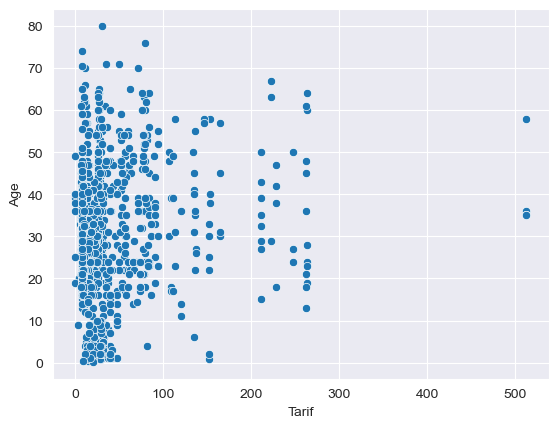

In [270]:
# On affiche l'age en fonction du tarif
sns.scatterplot(x='Tarif', y='Age', data=df)

<Figure size 1800x1000 with 0 Axes>

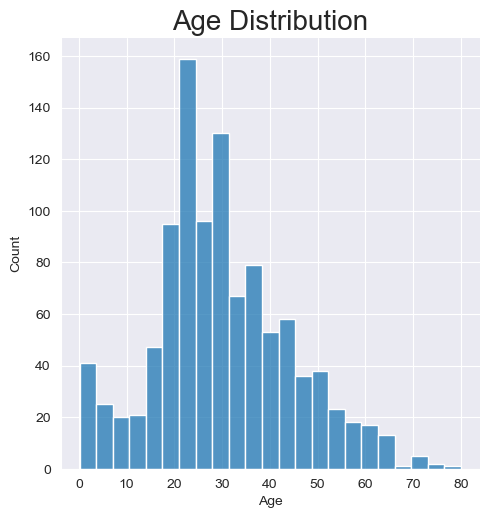

<Figure size 1800x1000 with 0 Axes>

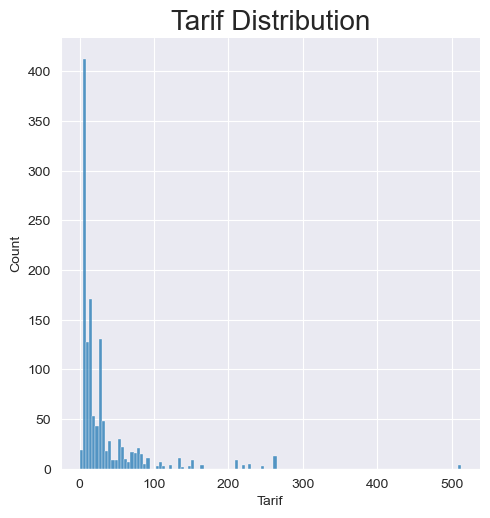

In [271]:
for feature in df.select_dtypes('float64'):
    plt.figure(figsize=(18,10))
    sns.displot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

<AxesSubplot:xlabel='Classe', ylabel='Tarif'>

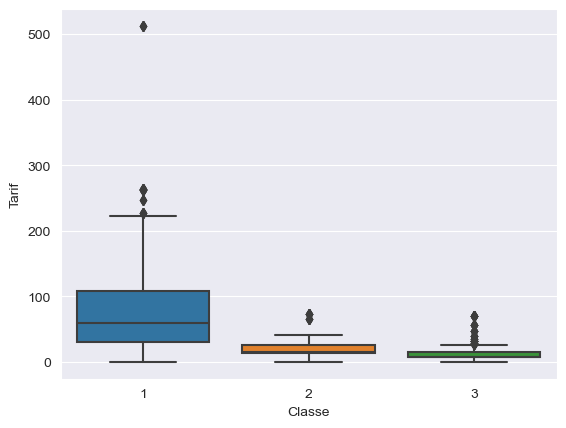

In [272]:
# on affiche le tarif en fonction de la classe
sns.boxplot(x='Classe', y='Tarif', data=df)

## Valeurs aberrantes

<AxesSubplot:xlabel='Age'>

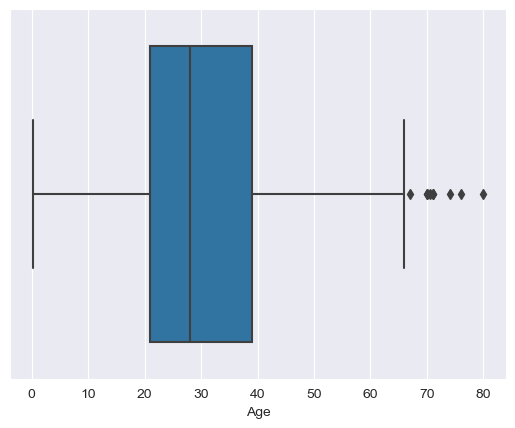

In [273]:
# on affiche les valeurs aberrantes de l'age
sns.boxplot(x='Age', data=df)

## Analyse multivariée

<AxesSubplot:xlabel='Age', ylabel='Classe'>

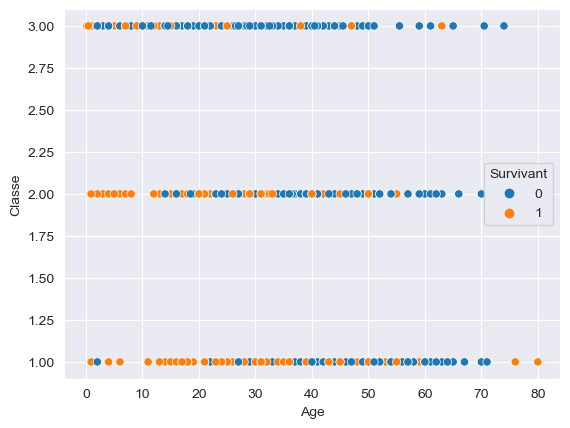

In [274]:
sns.scatterplot(x='Age', y='Classe', hue='Survivant', data=df)

In [275]:
# on affiche les pourcentages de survivants en fonction du sexe et du nombre de parents/enfants
for i in df['NbParentEnfant'].unique():
    print('NbParentEnfant : ', i)
    count_homme = df[(df['Sexe'] == 0) & (df['NbParentEnfant'] == i)]['Survivant'].value_counts()
    count_femme = df[(df['Sexe'] == 1) & (df['NbParentEnfant'] == i)]['Survivant'].value_counts()
    if len(count_homme) != 0:
        if len(count_homme) == 2:
            print('Homme : ', count_homme[1] / (count_homme[1] + count_homme[0]) * 100, '%')
        else:
            print()
    if len(count_femme) != 0:
        if len(count_femme) == 2:
            print('Femme : ', count_femme[1] / (count_femme[1] + count_femme[0]) * 100, '%')
        else:
            print()

NbParentEnfant :  0
Homme :  16.666666666666664 %
Femme :  74.40273037542661 %
NbParentEnfant :  2
Homme :  29.545454545454547 %
Femme :  63.76811594202898 %
NbParentEnfant :  1
Homme :  36.58536585365854 %
Femme :  79.54545454545455 %
NbParentEnfant :  4

Femme :  25.0 %
NbParentEnfant :  3

Femme :  83.33333333333334 %
NbParentEnfant :  5

Femme :  25.0 %
NbParentEnfant :  6


NbParentEnfant :  9




In [276]:
# on crée une nouvelle colonne booléenne pour savoir si la personne 0 : homme sans enfant, 1 : homme avec enfant, 2 : femme sans enfant, 3 : femme avec enfant
df['Sexe/Enfant'] = df.apply(lambda x: 0 if x['Sexe'] == 0 and x['NbParentEnfant'] == 0 else 1 if x['Sexe'] == 0 and x['NbParentEnfant'] != 0 else 2 if x['Sexe'] == 1 and x['NbParentEnfant'] == 0 else 3, axis=1)

<AxesSubplot:xlabel='Sexe/Enfant', ylabel='count'>

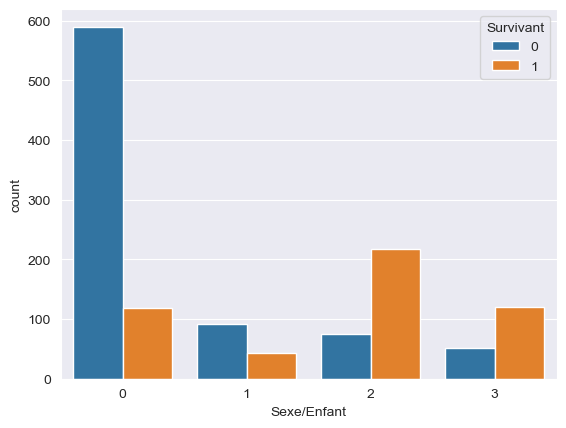

In [277]:
# on affiche les survivants en fonction du sexe et du nombre d'enfants
sns.countplot(x='Sexe/Enfant', hue='Survivant', data=df)
# on supprime la colonne Sexe/Enfant
# df = df.drop('Sexe/Enfant', axis=1)

In [278]:
# on crée deux classes, une pour les enfants (0) et une pour les adultes (1)
# les enfants vont de l'age (0, 15)
df['Age'] = df['Age'].apply(lambda x: 0 if x <= 15 else 1)

## Corrélation

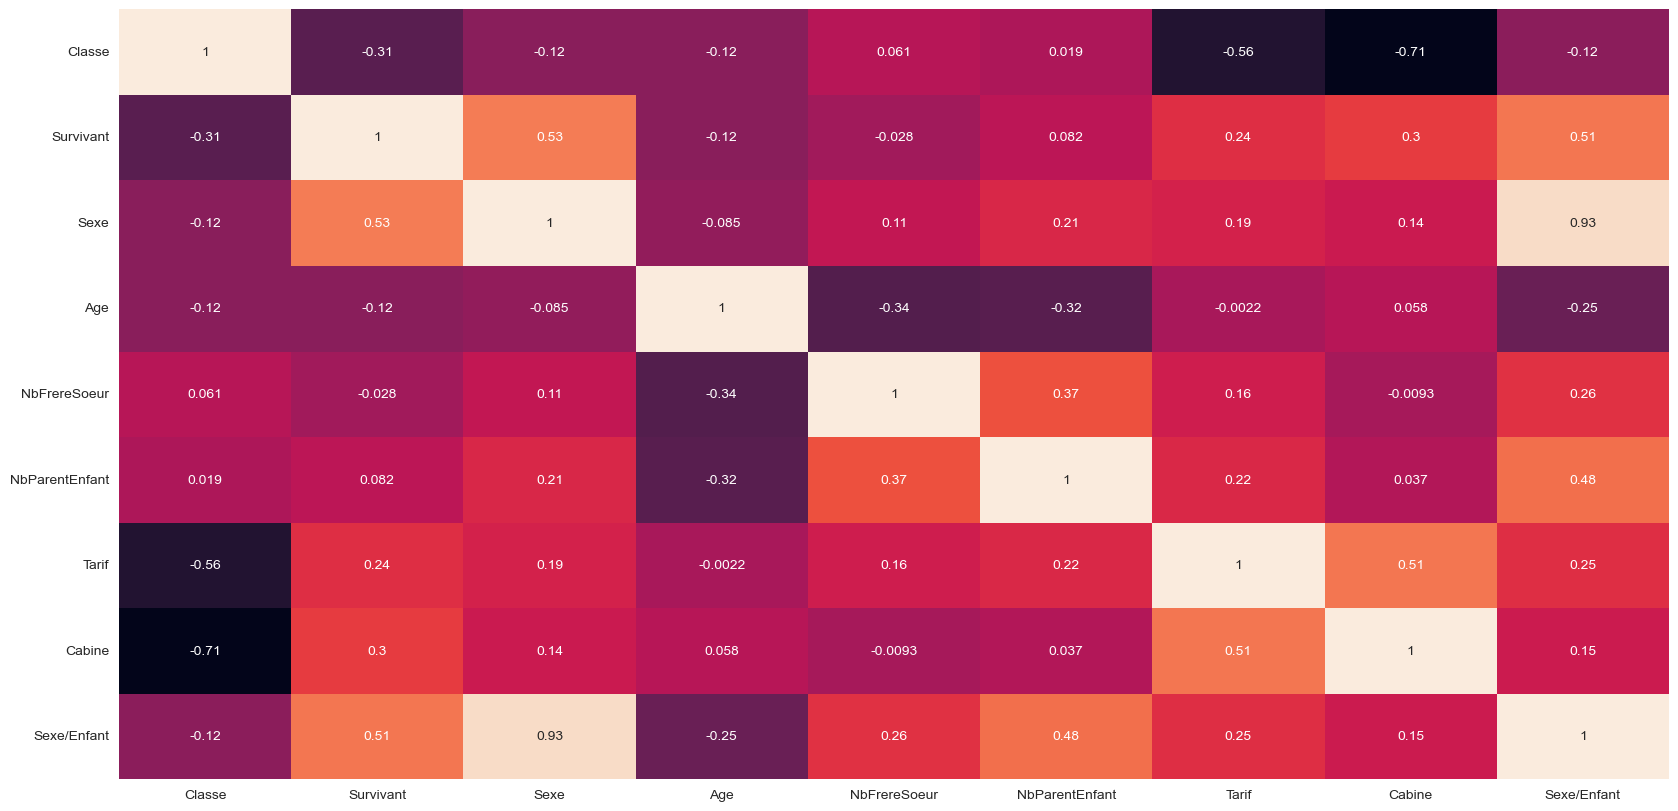

In [279]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cbar=False) #
plt.show()

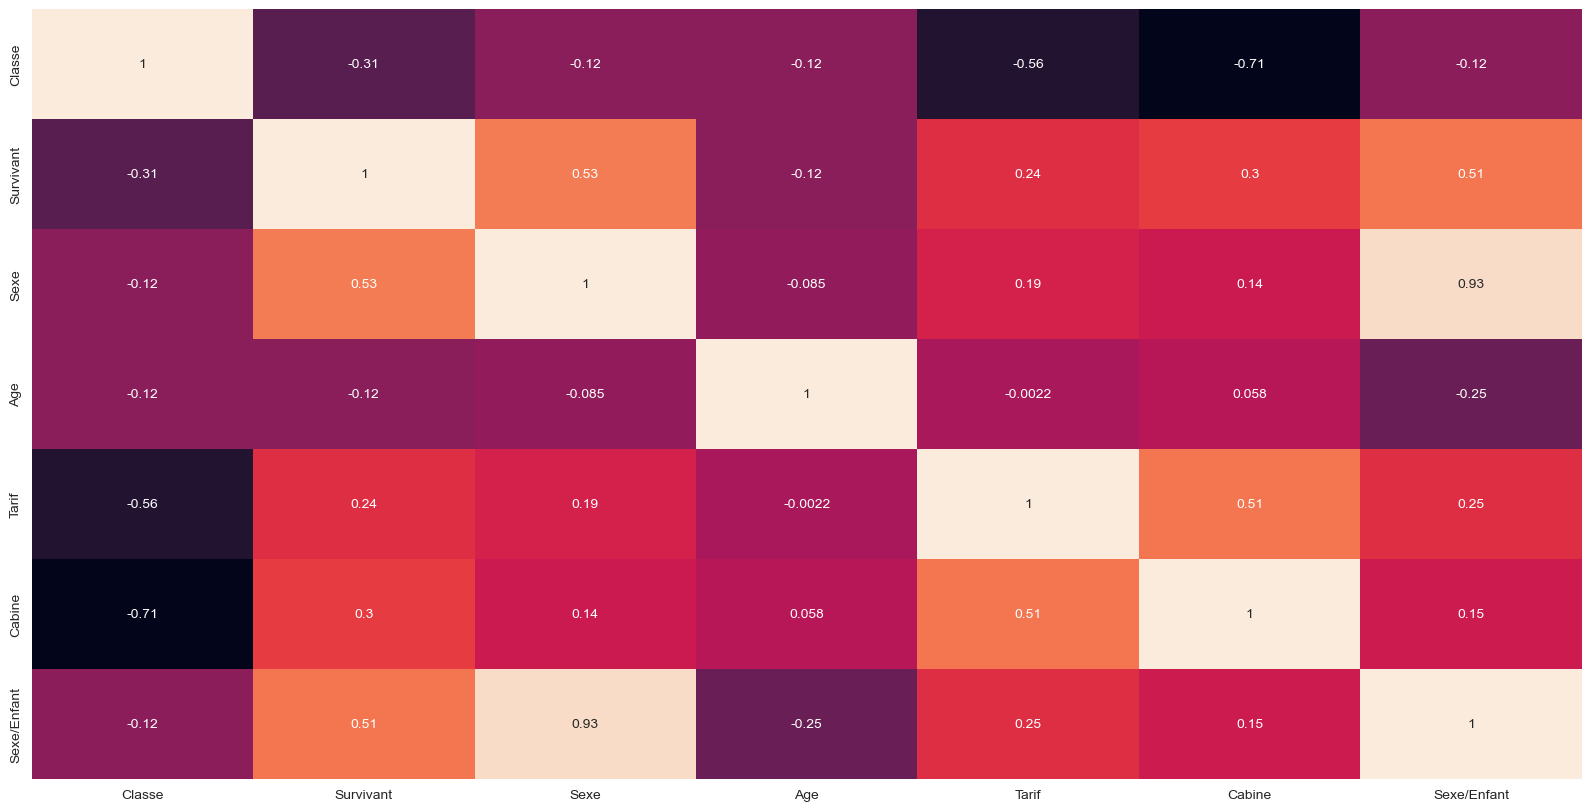

In [280]:
# on retire le nombre de frères/sœurs, car il présente peu d'intérêt
df.drop('NbFrereSoeur', axis=1, inplace=True)
df.drop('NbParentEnfant', axis=1, inplace=True)
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cbar=False) #
plt.show()

## Modélisation prédictive

In [281]:
# models
logreg = LogisticRegression(penalty='none')
logregRidge = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
logregLasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
logregElasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)

In [282]:
dict_models = {"Reression logistique": logreg,
               "Regression logistique + Ridge": logregRidge,
               "Regression logistique + Lasso": logregLasso,
               "Regression logistique + Elastic Net": logregElasticNet
               }

## Entrainement du modèle

In [283]:
# on coupe le dataset en deux parties, une pour l'entrainement et une pour le test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survivant', axis=1), df['Survivant'], test_size=0.1, random_state=1)

In [284]:
X_train

,Classe,Sexe,Age,Tarif,Cabine,Sexe/Enfant
87,1,0,1,30.5000,0,0
223,1,0,1,0.0000,0,0
997,3,1,1,7.2250,0,2
1206,3,0,0,27.9000,0,1
833,3,0,1,8.0500,0,0
...,...,...,...,...,...,...
715,3,0,1,8.0500,0,0
905,3,0,1,7.8542,0,0
1096,3,0,0,21.0750,0,1
235,1,0,1,39.6000,0,0


In [285]:
X_test

,Classe,Sexe,Age,Tarif,Cabine,Sexe/Enfant
201,1,0,1,51.8625,1,0
115,1,0,1,263.0000,1,1
255,1,1,1,69.3000,1,2
730,3,0,1,7.8958,0,0
195,1,1,1,86.5000,1,2
...,...,...,...,...,...,...
585,2,0,1,26.0000,0,0
897,3,0,1,7.7750,0,0
419,2,0,1,11.5000,0,0
49,1,0,1,512.3292,1,1


Régression logistique

Matrice de confusion:
[[77  8]
 [ 9 37]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        85
           1       0.82      0.80      0.81        46

    accuracy                           0.87       131
   macro avg       0.86      0.86      0.86       131
weighted avg       0.87      0.87      0.87       131
 

Exactitude: 87.022901 



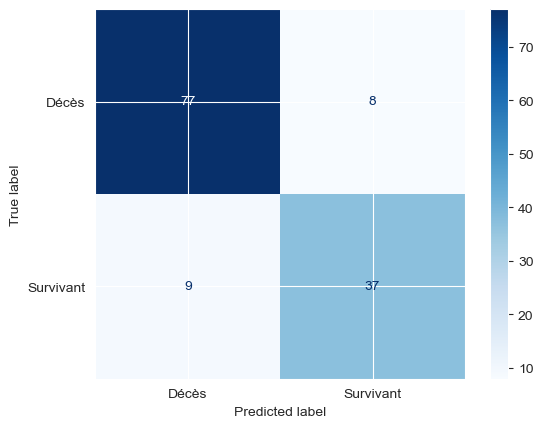

In [286]:
## régression logistique
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_logreg), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_logreg), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_logreg)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logreg), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
plt.show()

Régression logistique + Ridge

Matrice de confusion:
[[75 10]
 [ 7 39]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        85
           1       0.80      0.85      0.82        46

    accuracy                           0.87       131
   macro avg       0.86      0.87      0.86       131
weighted avg       0.87      0.87      0.87       131
 

Exactitude: 87.022901 

Coefficients:  [[-6.21090175e-01  5.40345196e-01 -2.01912382e-01 -5.41546997e-04
   4.01897352e-01  7.90087705e-01]]


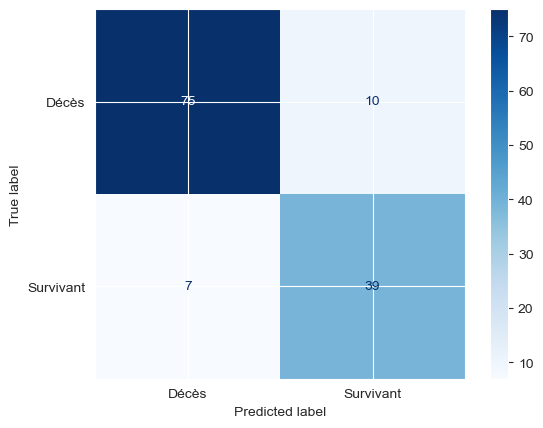

In [287]:
## régression logistique + ridge
logregRidge.fit(X_train, y_train)
y_pred_ridge = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_ridge), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_ridge), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_ridge)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ridge), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
# on affiche les coefficients
print('Coefficients: ', logregRidge.coef_)
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[75 10]
 [ 7 39]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        85
           1       0.80      0.85      0.82        46

    accuracy                           0.87       131
   macro avg       0.86      0.87      0.86       131
weighted avg       0.87      0.87      0.87       131
 

Exactitude: 87.022901 



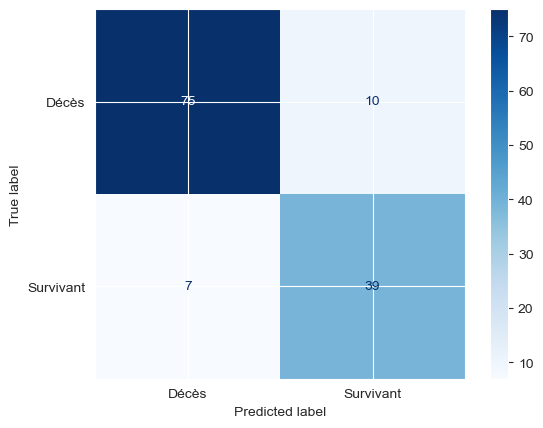

In [288]:
## régression logistique + Lasso
logregLasso.fit(X_train, y_train)
y_pred_lasso = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_lasso), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_lasso), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_lasso)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lasso), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
plt.show()

Régression logistique + Elastic Net

Matrice de confusion:
[[75 10]
 [ 7 39]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        85
           1       0.80      0.85      0.82        46

    accuracy                           0.87       131
   macro avg       0.86      0.87      0.86       131
weighted avg       0.87      0.87      0.87       131
 

Exactitude: 87.022901 



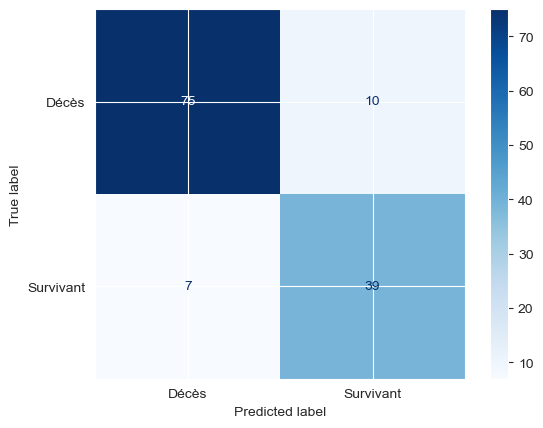

In [289]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train, y_train)
y_pred_elastic = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_elastic), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_elastic), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_elastic)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_elastic), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
plt.show()

In [290]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

Arbre de décision

Matrice de confusion:
[[75 10]
 [11 35]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        85
           1       0.78      0.76      0.77        46

    accuracy                           0.84       131
   macro avg       0.82      0.82      0.82       131
weighted avg       0.84      0.84      0.84       131
 

Exactitude: 83.969466 



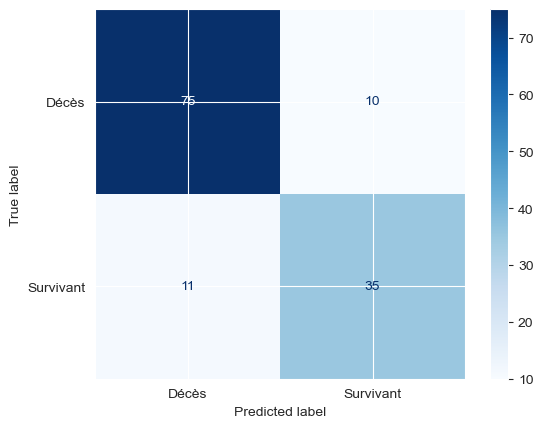

In [291]:
# on affiche les performances de l'arbre de décision
print('='*20)
print('Arbre de décision')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_tree), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_tree), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_tree)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_tree), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
plt.show()

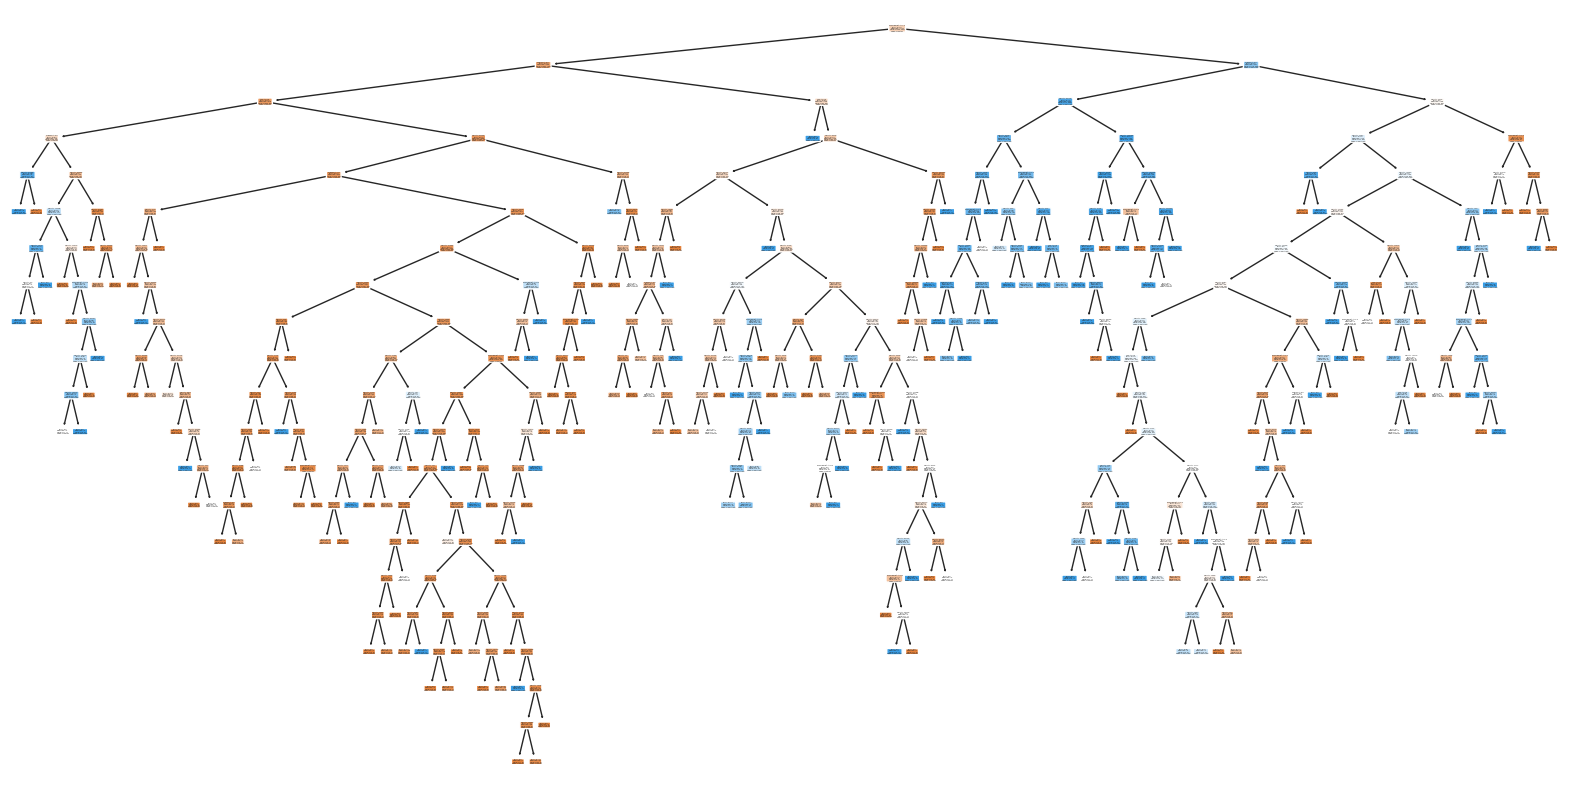

In [292]:
# on affiche l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, rounded=True, class_names=['Décès', 'Survivant'], feature_names=X_train.columns)
plt.show()

Forêt aléatoire

Matrice de confusion:
[[84  1]
 [12 34]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        85
           1       0.97      0.74      0.84        46

    accuracy                           0.90       131
   macro avg       0.92      0.86      0.88       131
weighted avg       0.91      0.90      0.90       131
 

Exactitude: 90.076336 



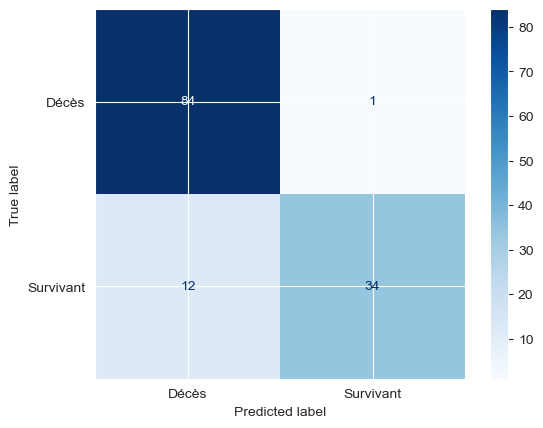

In [293]:
# on crée un modèle de forêt aléatoire
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print('='*20)
print('Forêt aléatoire')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_forest), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_forest), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_forest)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_forest), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
plt.show()

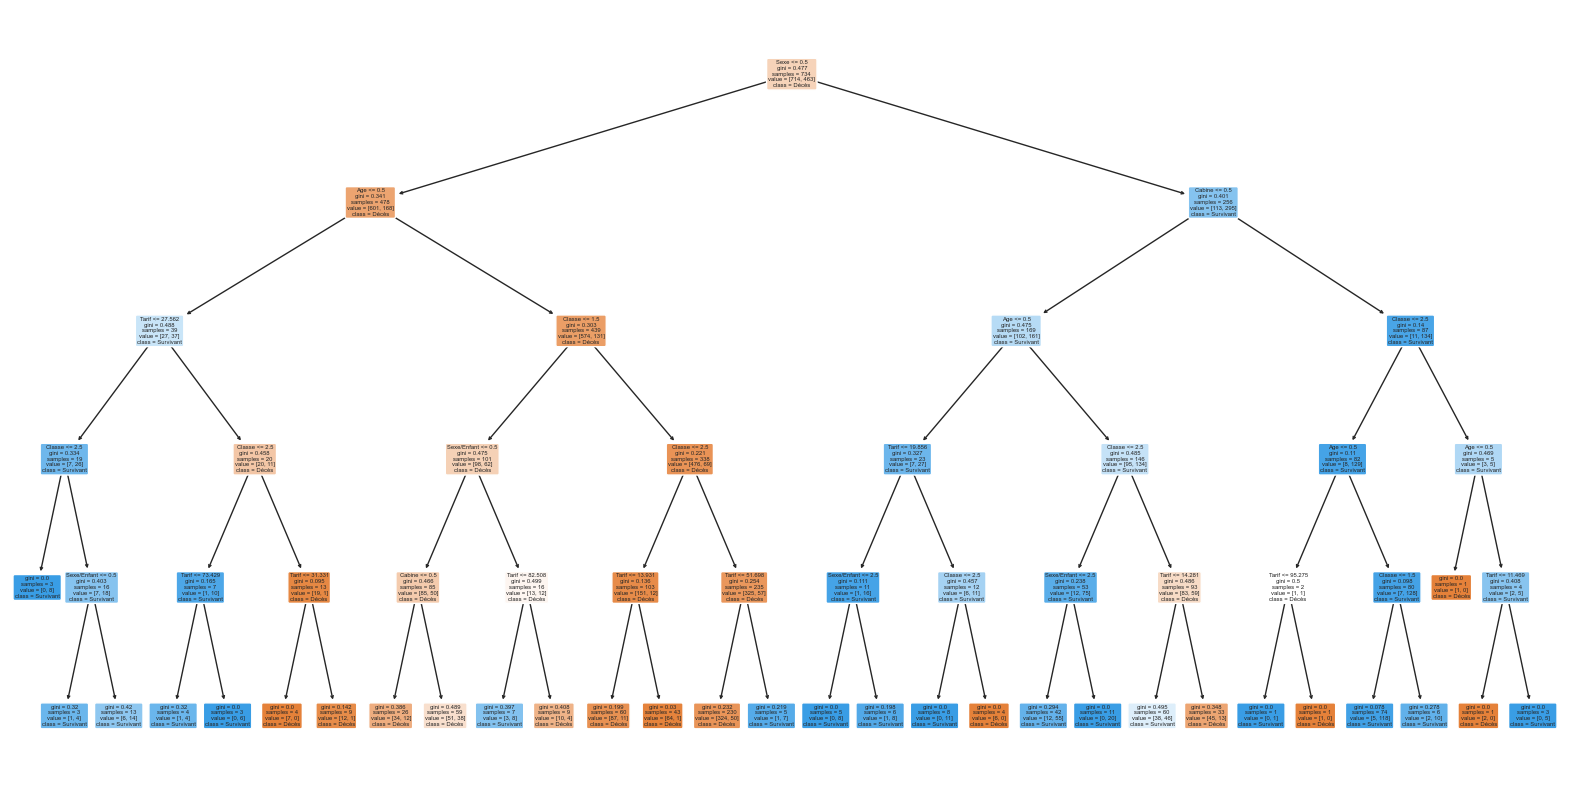

In [294]:
# on affiche la forêt aléatoire
plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[0], filled=True, rounded=True, class_names=['Décès', 'Survivant'], feature_names=X_train.columns)
plt.show()

Adaboost

Matrice de confusion:
[[79  6]
 [ 7 39]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        85
           1       0.87      0.85      0.86        46

    accuracy                           0.90       131
   macro avg       0.89      0.89      0.89       131
weighted avg       0.90      0.90      0.90       131
 

Exactitude: 90.076336 



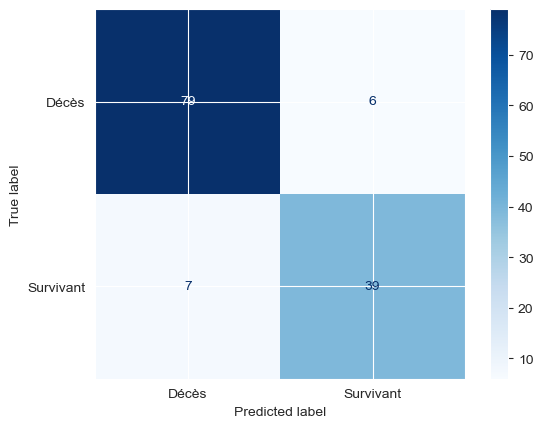

In [295]:
# on utilise adaboost
adaboost = AdaBoostClassifier(n_estimators=75, random_state=1)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

print('='*20)
print('Adaboost')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_ada), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_ada), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_ada)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ada), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
plt.show()

# Evaluation des modèles

In [296]:
# on crée un dataframe pour stocker les résultats
df_resultats = pd.DataFrame(columns=['Modèle', 'Exactitude'])

# on ajoute les résultats de la régression logistique
# append est déprécié, on utilise loc
df_resultats.loc[0] = ['Régression logistique', accuracy_score(y_test,y_pred_logreg)*100]
df_resultats.loc[1] = ['Régression logistique + Ridge', accuracy_score(y_test,y_pred_ridge)*100]
df_resultats.loc[2] = ['Régression logistique + Lasso', accuracy_score(y_test,y_pred_lasso)*100]
df_resultats.loc[3] = ['Régression logistique + Elastic Net', accuracy_score(y_test,y_pred_elastic)*100]
df_resultats.loc[4] = ['Arbre de décision', accuracy_score(y_test,y_pred_tree)*100]
df_resultats.loc[5] = ['Forêt aléatoire', accuracy_score(y_test,y_pred_forest)*100]
df_resultats.loc[6] = ['Adaboost', accuracy_score(y_test,y_pred_ada)*100]

# on trie les résultats par exactitude décroissante
df_resultats.sort_values(by='Exactitude', ascending=False, inplace=True)

# on affiche le dataframe
df_resultats

,Modèle,Exactitude
5,Forêt aléatoire,90.076336
6,Adaboost,90.076336
0,Régression logistique,87.022901
1,Régression logistique + Ridge,87.022901
2,Régression logistique + Lasso,87.022901
3,Régression logistique + Elastic Net,87.022901
4,Arbre de décision,83.969466


<Figure size 1000x1000 with 0 Axes>

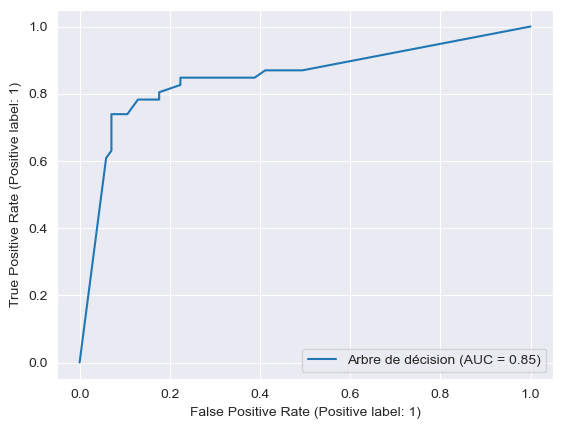

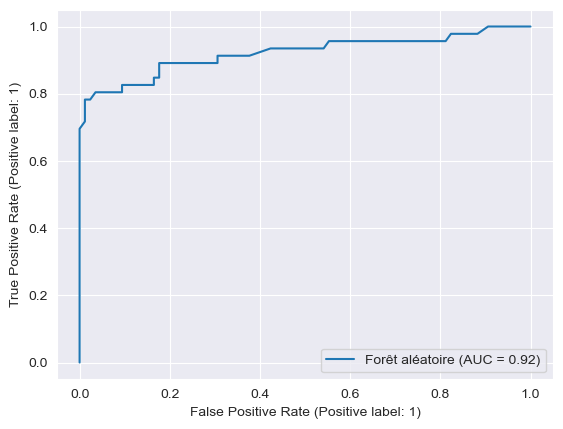

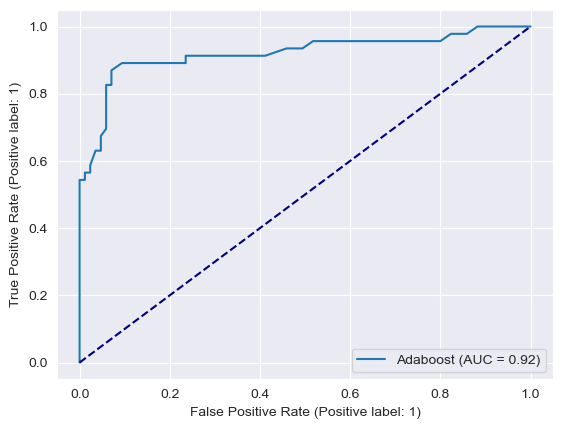

In [297]:
# on affiche la courbe ROC pour les trois meilleurs modèles
plt.figure(figsize=(10, 10))
RocCurveDisplay.from_estimator(tree, X_test, y_test, name='Arbre de décision')
RocCurveDisplay.from_estimator(forest, X_test, y_test, name='Forêt aléatoire')
RocCurveDisplay.from_estimator(adaboost, X_test, y_test, name='Adaboost')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc="lower right")
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\cleme\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

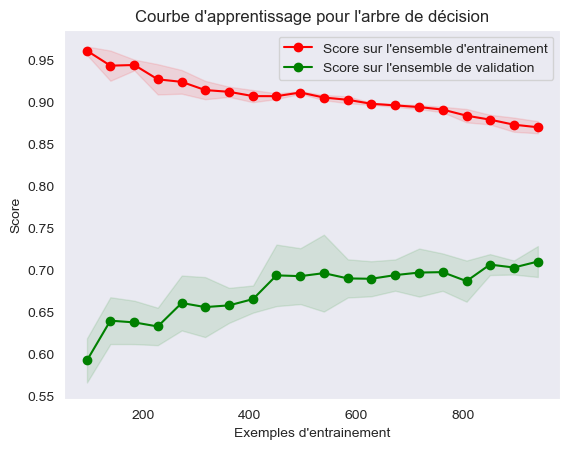

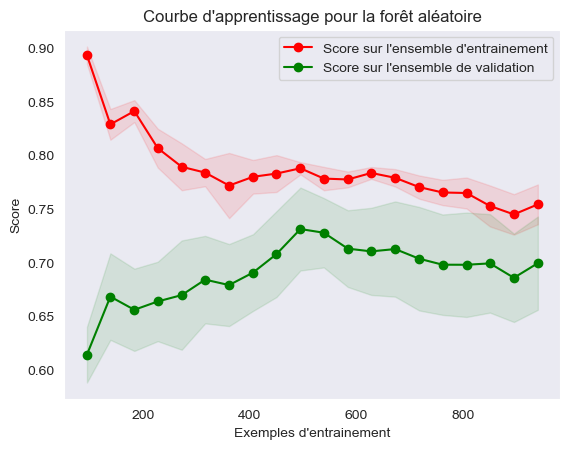

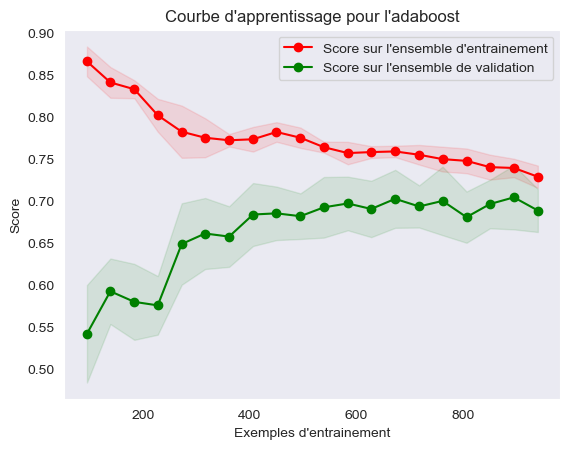

In [298]:
# on vérifie que l'on n'est pas dans le cas de l'overfitting en visualisant la courbe d'apprentissage pour les trois modèles précédents

# on crée une fonction pour afficher la courbe d'apprentissage (f1 score en fonction du nombre d'exemples d'entrainement) 20 fois
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 20)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Exemples d'entrainement")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score sur l'ensemble d'entrainement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score sur l'ensemble de validation")
    plt.legend(loc="best")
    return plt

# on affiche la courbe d'apprentissage pour les trois meilleurs modèles
plot_learning_curve(tree, 'Courbe d\'apprentissage pour l\'arbre de décision', X_train, y_train, cv=5)
plot_learning_curve(forest, 'Courbe d\'apprentissage pour la forêt aléatoire', X_train, y_train, cv=5)
plot_learning_curve(adaboost, 'Courbe d\'apprentissage pour l\'adaboost', X_train, y_train, cv=5)

In [299]:
# on affiche le f1 score pour les trois meilleurs modèles
print('F1 score pour l\'arbre de décision: %f' %(f1_score(y_test, y_pred_tree)*100))
print('F1 score pour la forêt aléatoire: %f' %(f1_score(y_test, y_pred_forest)*100))
print('F1 score pour l\'adaboost: %f' %(f1_score(y_test, y_pred_ada)*100))

# les résultats du f1 score final sont différents de ceux de la courbe d'apprentissage

F1 score pour l'arbre de décision: 76.923077
F1 score pour la forêt aléatoire: 83.950617
F1 score pour l'adaboost: 85.714286


Résultats du système de vote

Matrice de confusion:
[[82  3]
 [ 7 39]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        85
           1       0.93      0.85      0.89        46

    accuracy                           0.92       131
   macro avg       0.92      0.91      0.91       131
weighted avg       0.92      0.92      0.92       131
 

Exactitude: 92.366412 



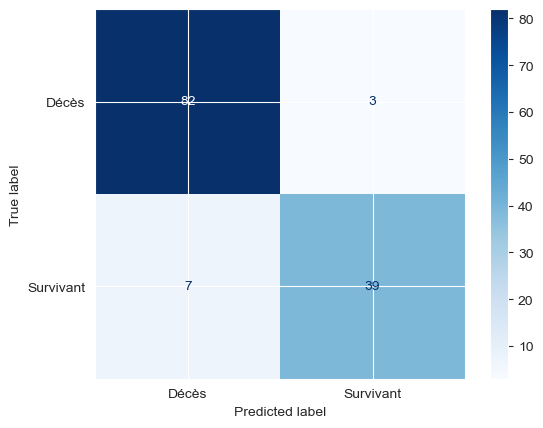

In [300]:
# on crée un système de vote pour tous nos modèles
# on importe la classe VotingClassifier
from sklearn.ensemble import VotingClassifier

# on crée un objet de la classe VotingClassifier
voting = VotingClassifier(estimators=[('tree', tree), ('forest', forest), ('adaboost', adaboost)], voting='hard')

# on entraîne le modèle
voting.fit(X_train, y_train)

# on prédit les résultats
y_pred_voting = voting.predict(X_test)

print('='*35)
print('Résultats du système de vote')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred_voting), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred_voting), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred_voting)*100), '\n')
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_voting), display_labels=['Décès', 'Survivant']).plot(values_format='d', cmap='Blues')
plt.show()

# Conclusion

In [301]:
# on affiche les résultats de tous nos modèles dans un dataframe, y compris le système de vote
df_resultats.loc[7] = ['Système de vote', accuracy_score(y_test,y_pred_voting)*100]

# on trie les résultats par exactitude décroissante
df_resultats.sort_values(by='Exactitude', ascending=False, inplace=True)

# on affiche le dataframe
df_resultats

,Modèle,Exactitude
7,Système de vote,92.366412
5,Forêt aléatoire,90.076336
6,Adaboost,90.076336
0,Régression logistique,87.022901
1,Régression logistique + Ridge,87.022901
2,Régression logistique + Lasso,87.022901
3,Régression logistique + Elastic Net,87.022901
4,Arbre de décision,83.969466


On peut voir que le système de vote est le meilleur modèle pour prédire si un passager a survécu ou non au naufrage du Titanic. Cela s'explique par le fait que le système de vote est un modèle qui combine plusieurs modèles de machine learning. On peut donc espérer que le système de vote soit plus robuste que les modèles individuels.

Le résultat final est donc de 92.36% d'exactitude pour le système de vote qui combine les trois modèles de machine learning suivants :
- Arbre de décision
- Forêt aléatoire
- Adaboost

Ce résultat est très satisfaisant, car il est supérieur à 90% d'exactitude, ce qui est un bon résultat pour un modèle de machine learning. Nous pouvons nous baser sur l'exactitude car le jeu de données est équilibré, c'est-à-dire que le nombre de passagers qui ont survécu au naufrage est égal au nombre de passagers qui sont décédés.

Le F1 score est également très satisfaisant, car il est supérieur à 90%. Nous pouvons donc conclure que la devise "les femmes et les enfants d'abord" a bien été appliquée lors du naufrage du Titanic. Nous pouvons aussi observer que les plus riches ont eu plus de chance de survie. Surement parce qu'ils étaient plus en haut du bateau.
On peut aussi observer un dernier fait, les hommes avec un enfant ou parent sur le bateau ont eu plus de chance de survie que les hommes seuls. Cela s'explique surement par le fait qu'ils ont voulue éviter de créer des orphelins.